# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [13]:
import pandas as pd
data = pd.read_csv('dataset.csv')
data

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

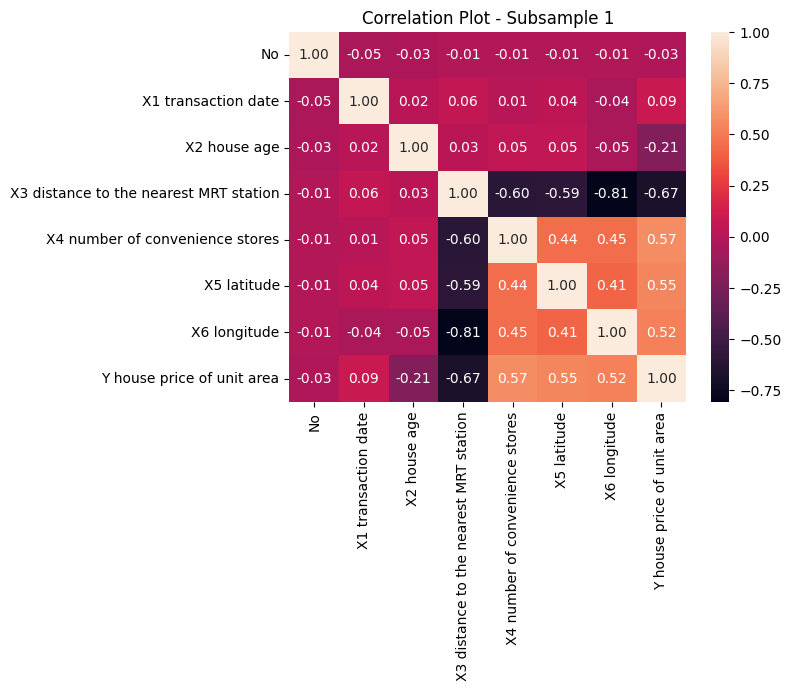

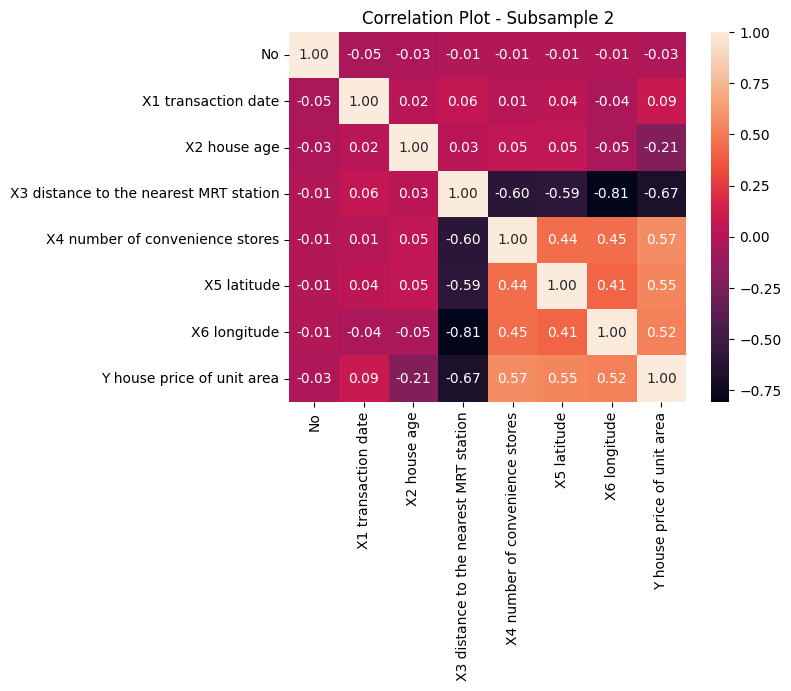

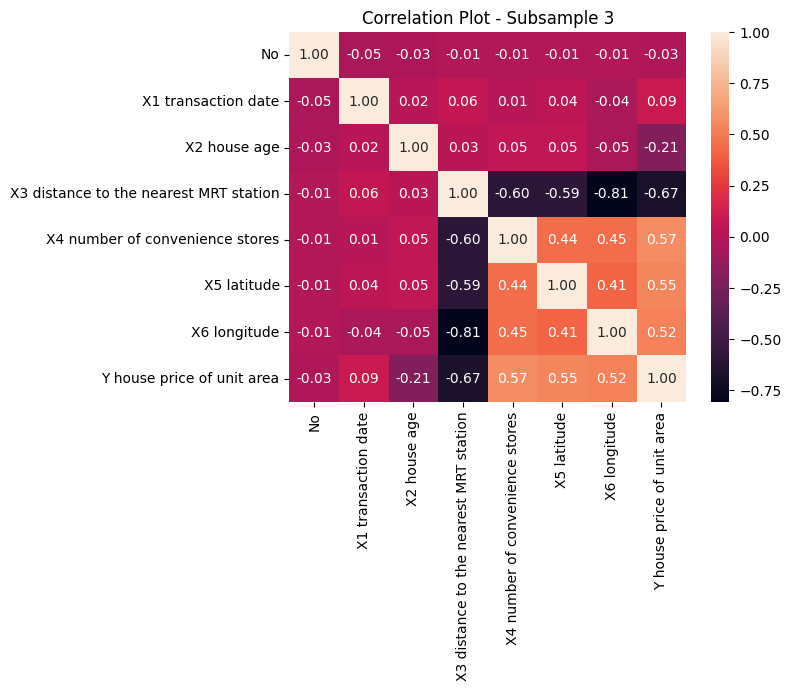

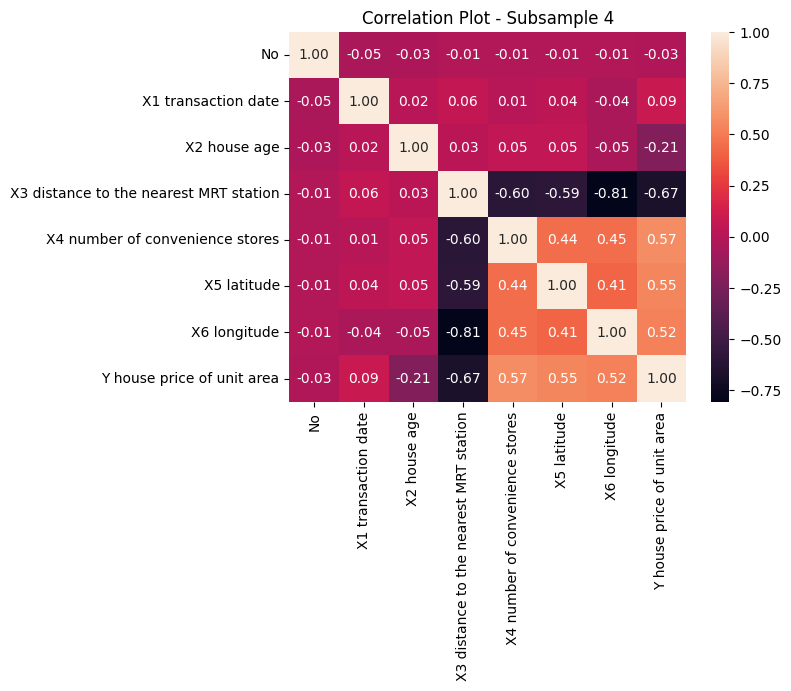

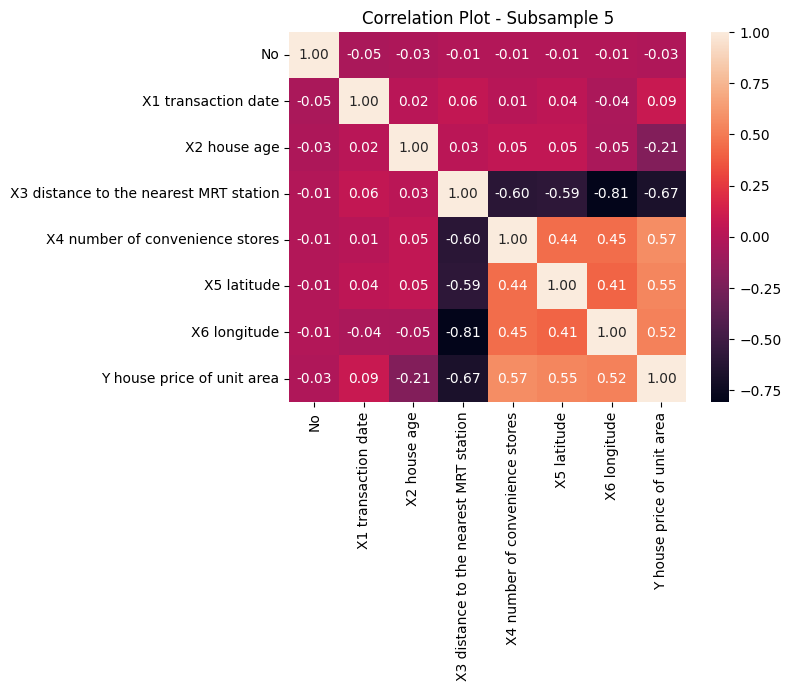

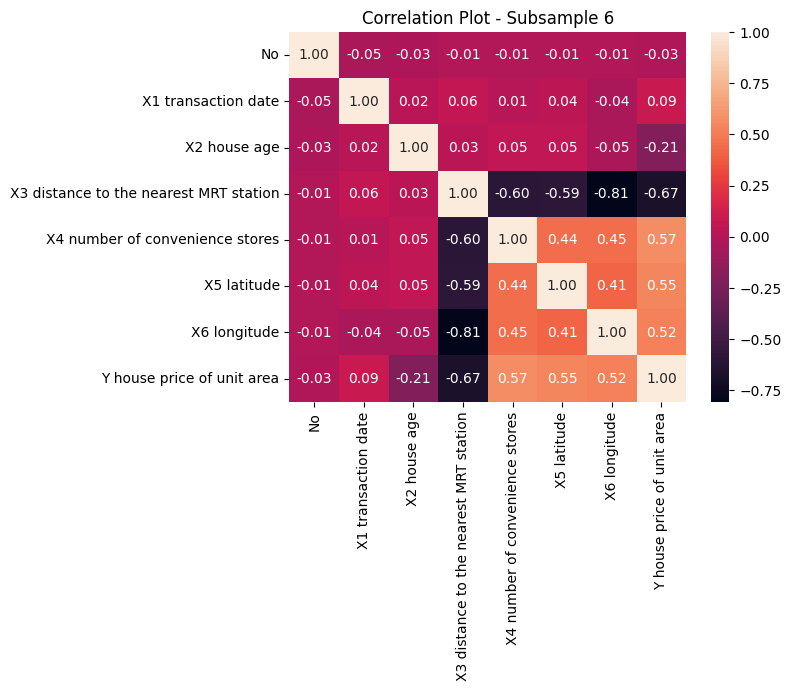

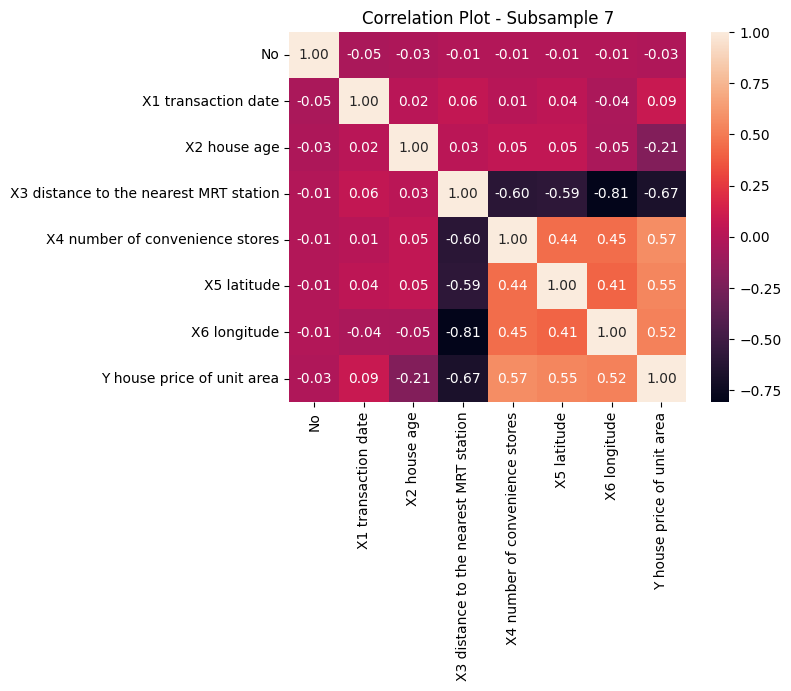

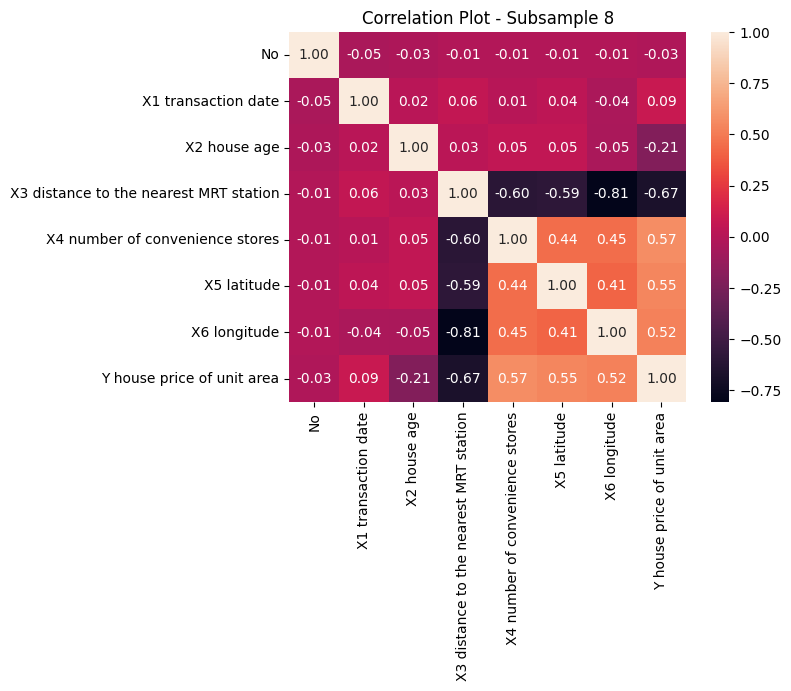

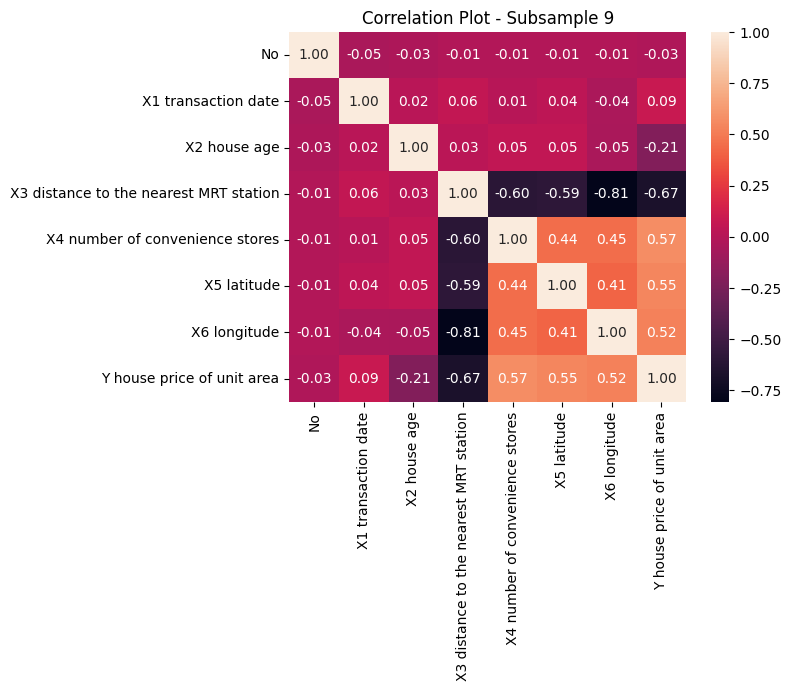

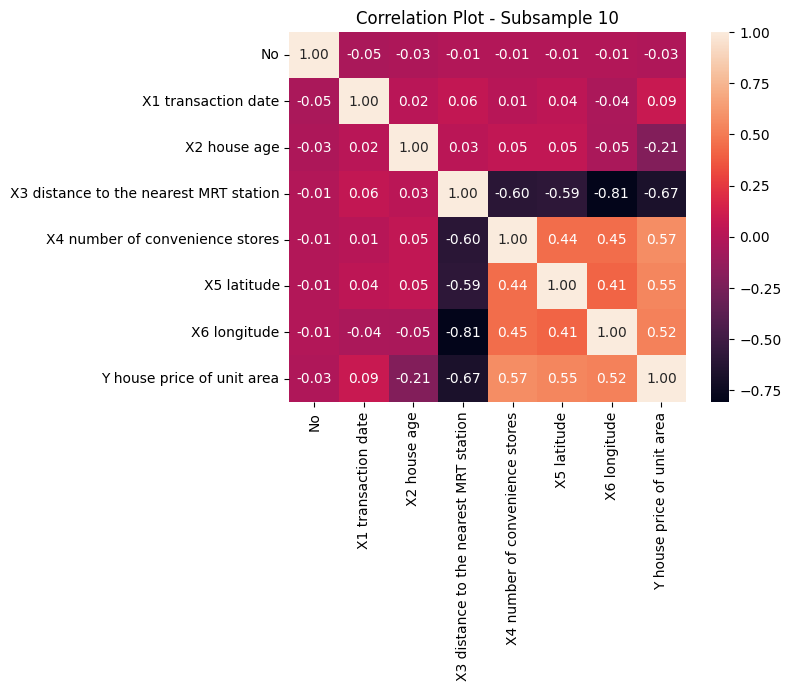

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

subsamples = 10
size = len(data)
for i in range(subsamples):
    subsample = data.sample(n = size)
    corr = subsample.corr()

    sns.heatmap(corr, annot = True, fmt=".2f")
    plt.title(f'Correlation Plot - Subsample {i+1}')
    plt.show()

TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe

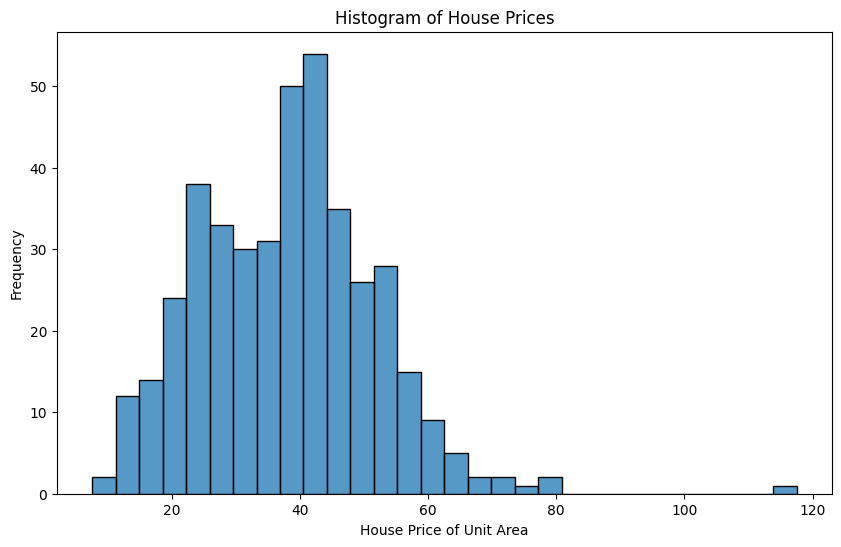

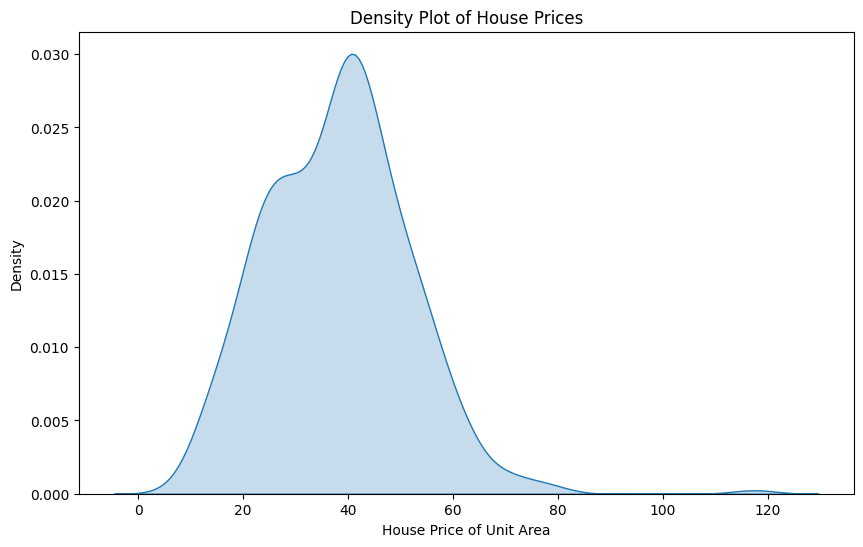

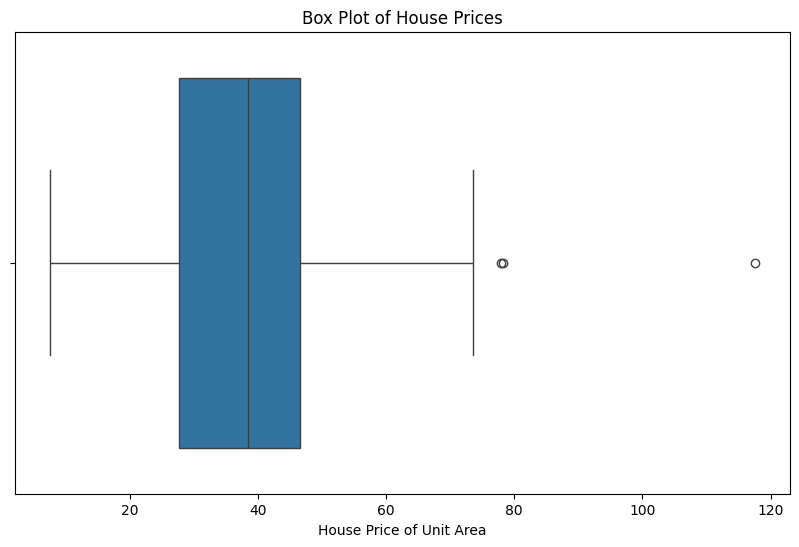

In [14]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Y house price of unit area'], kde=False, bins=30)
plt.title('Histogram of House Prices')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Y house price of unit area'], fill=True)
plt.title('Density Plot of House Prices')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Density')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Y house price of unit area'])
plt.title('Box Plot of House Prices')
plt.xlabel('House Price of Unit Area')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

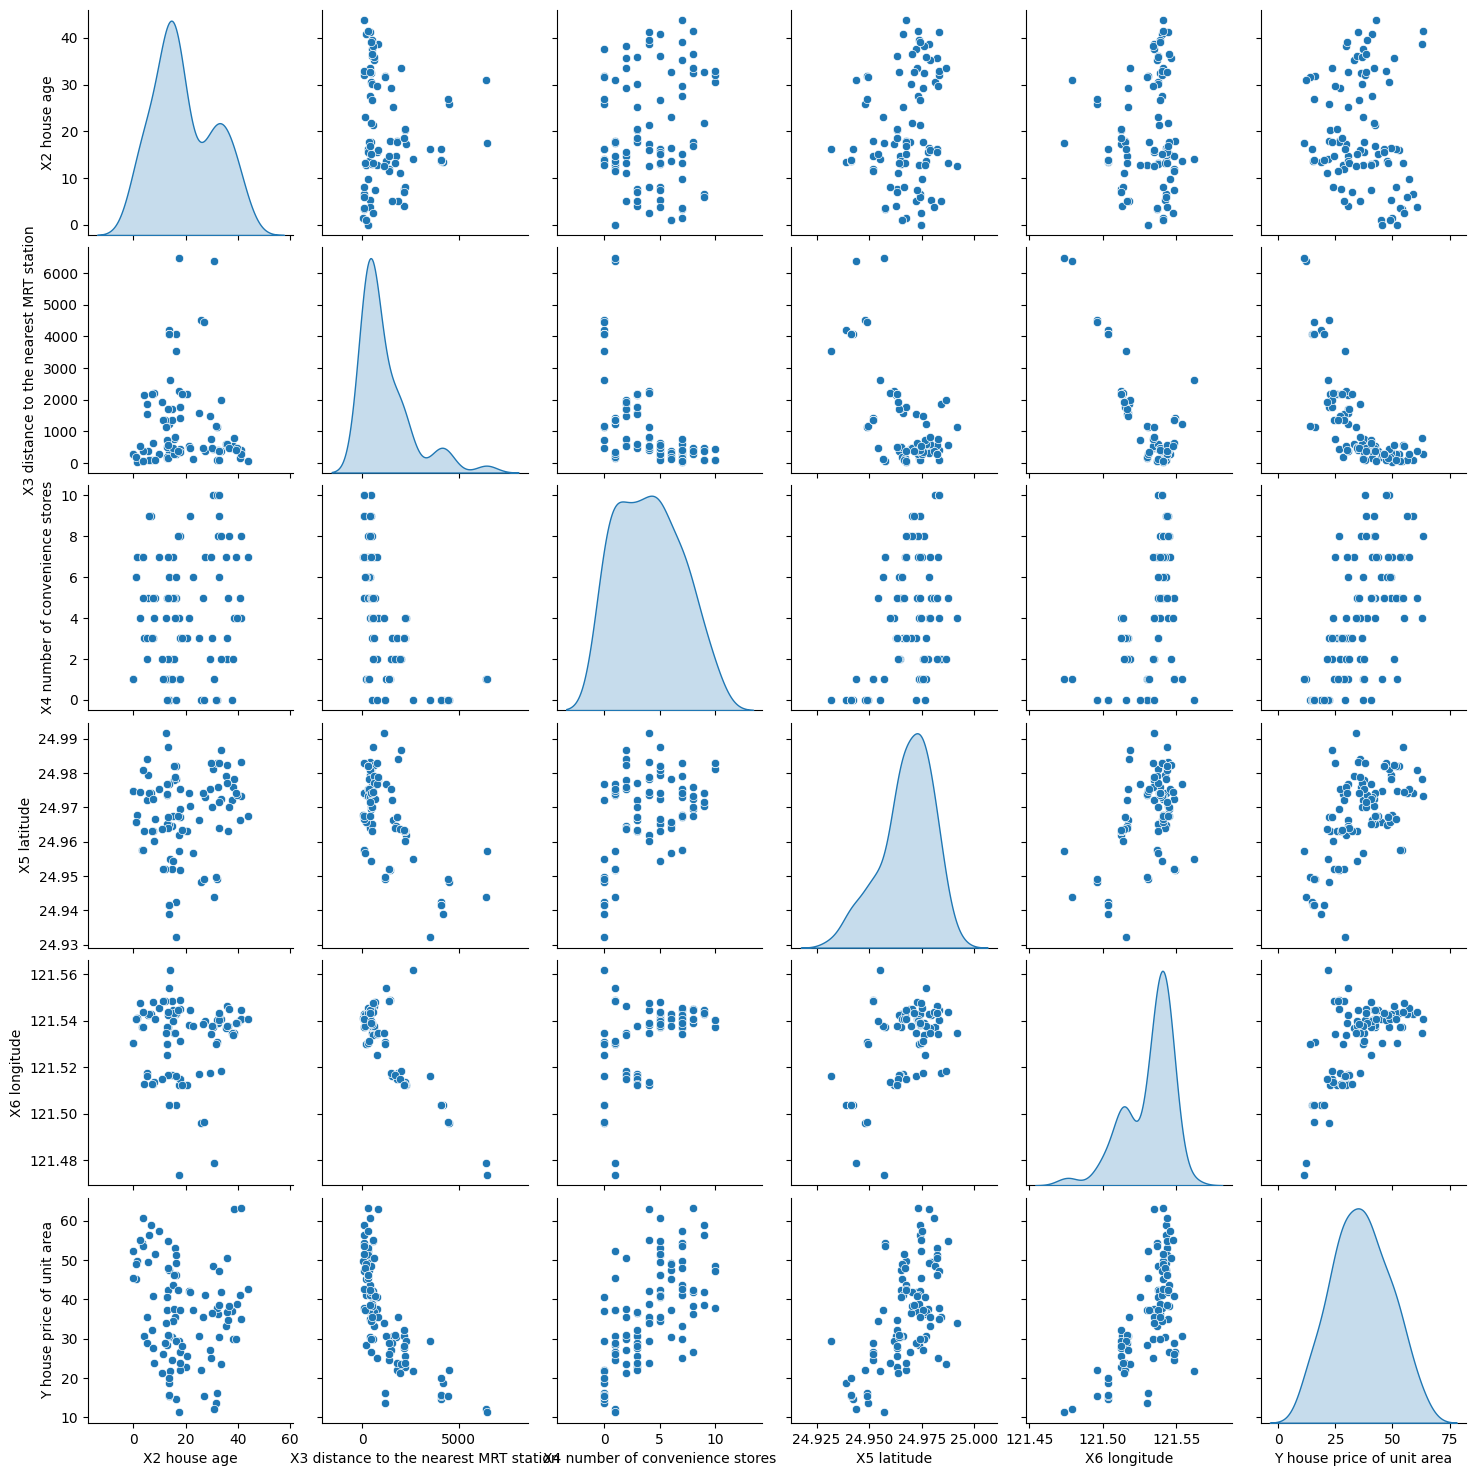

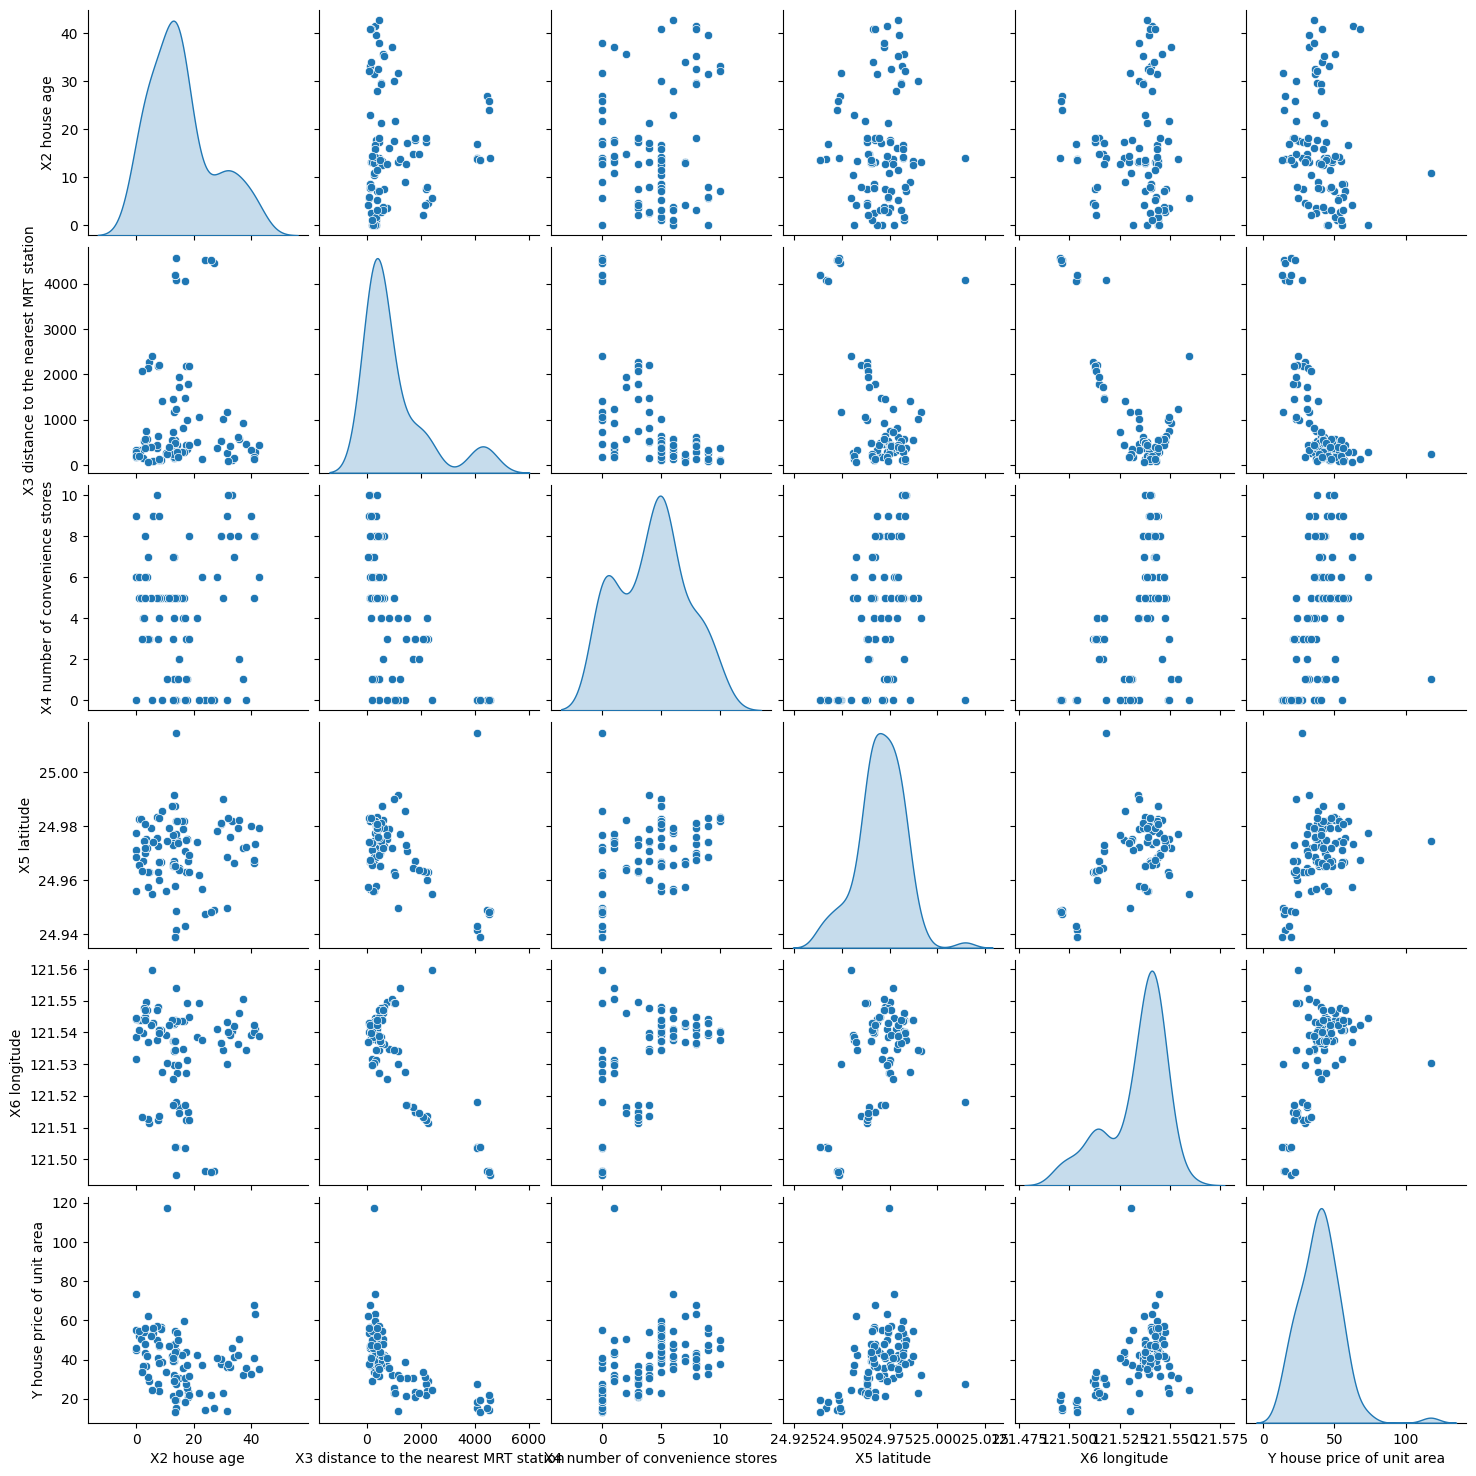

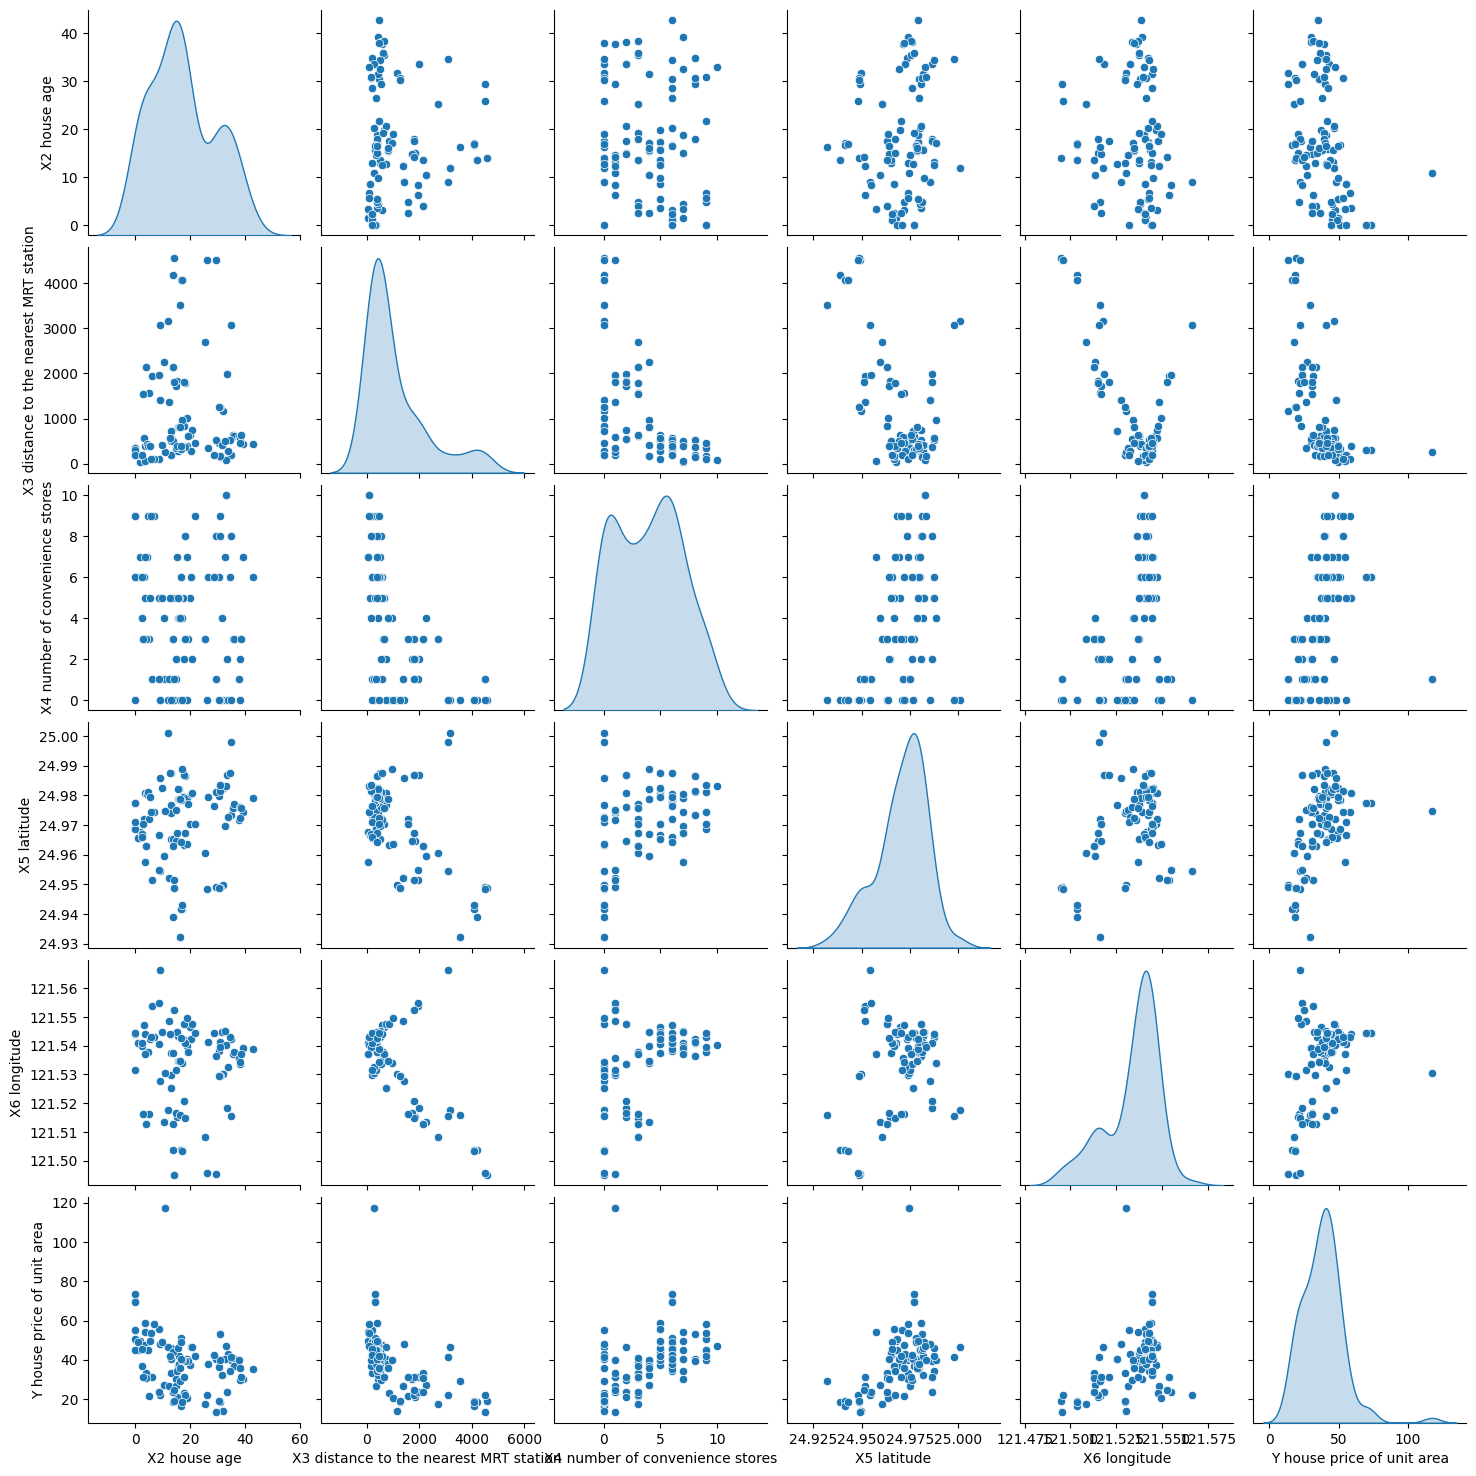

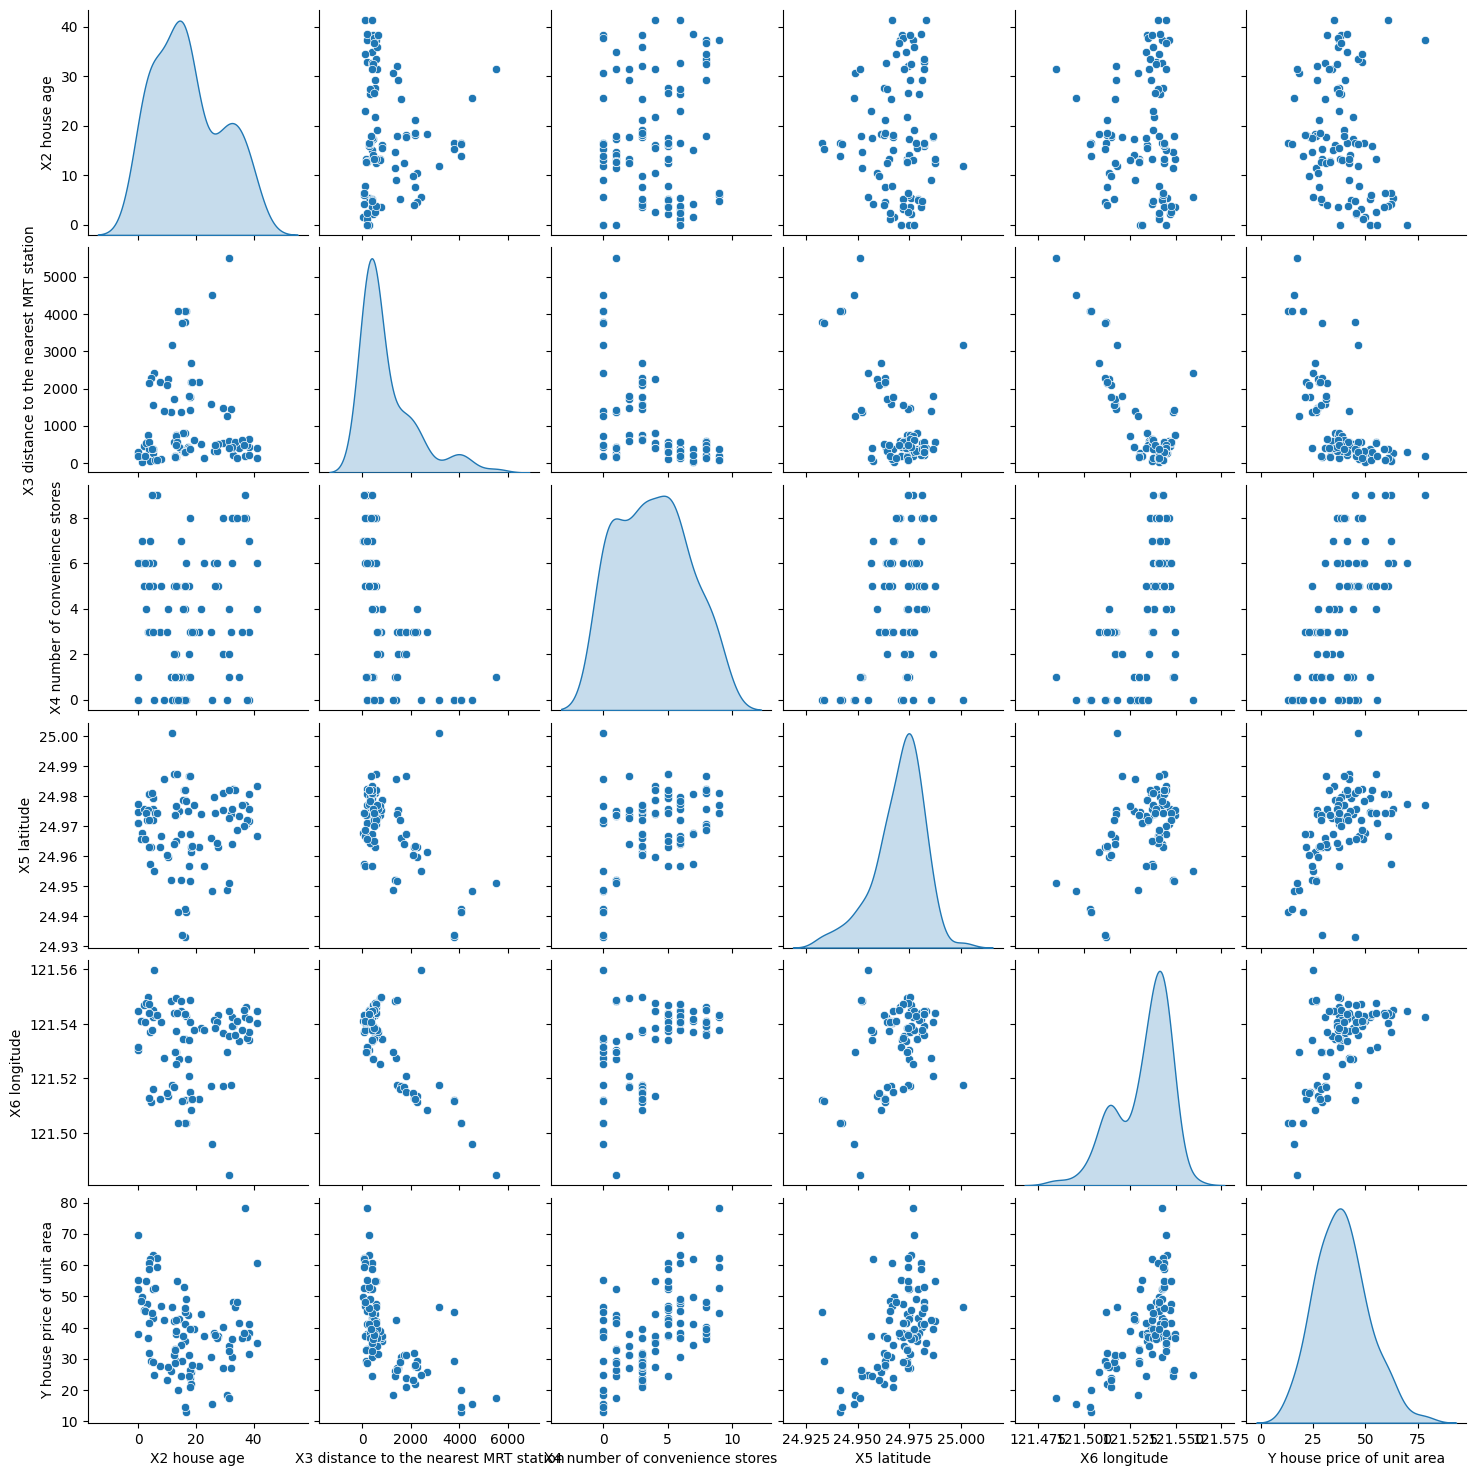

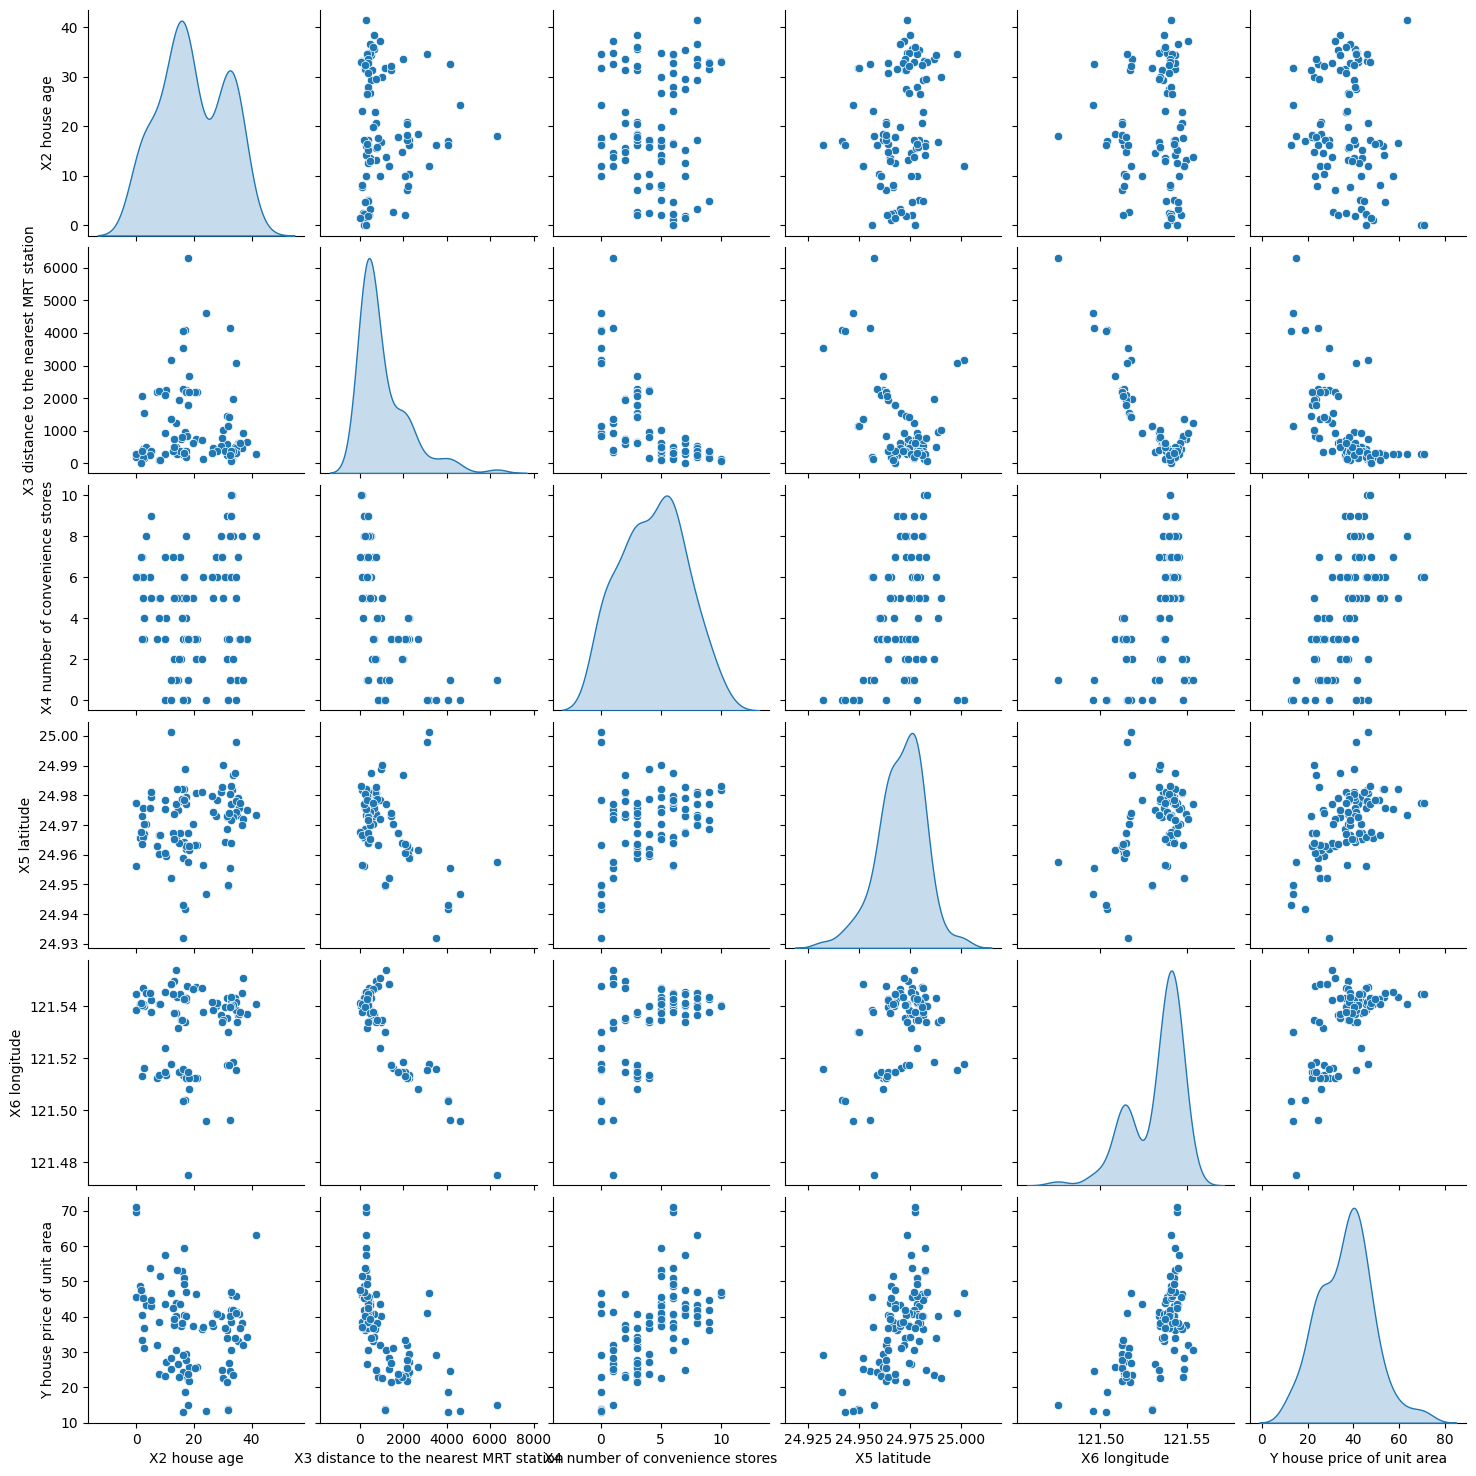

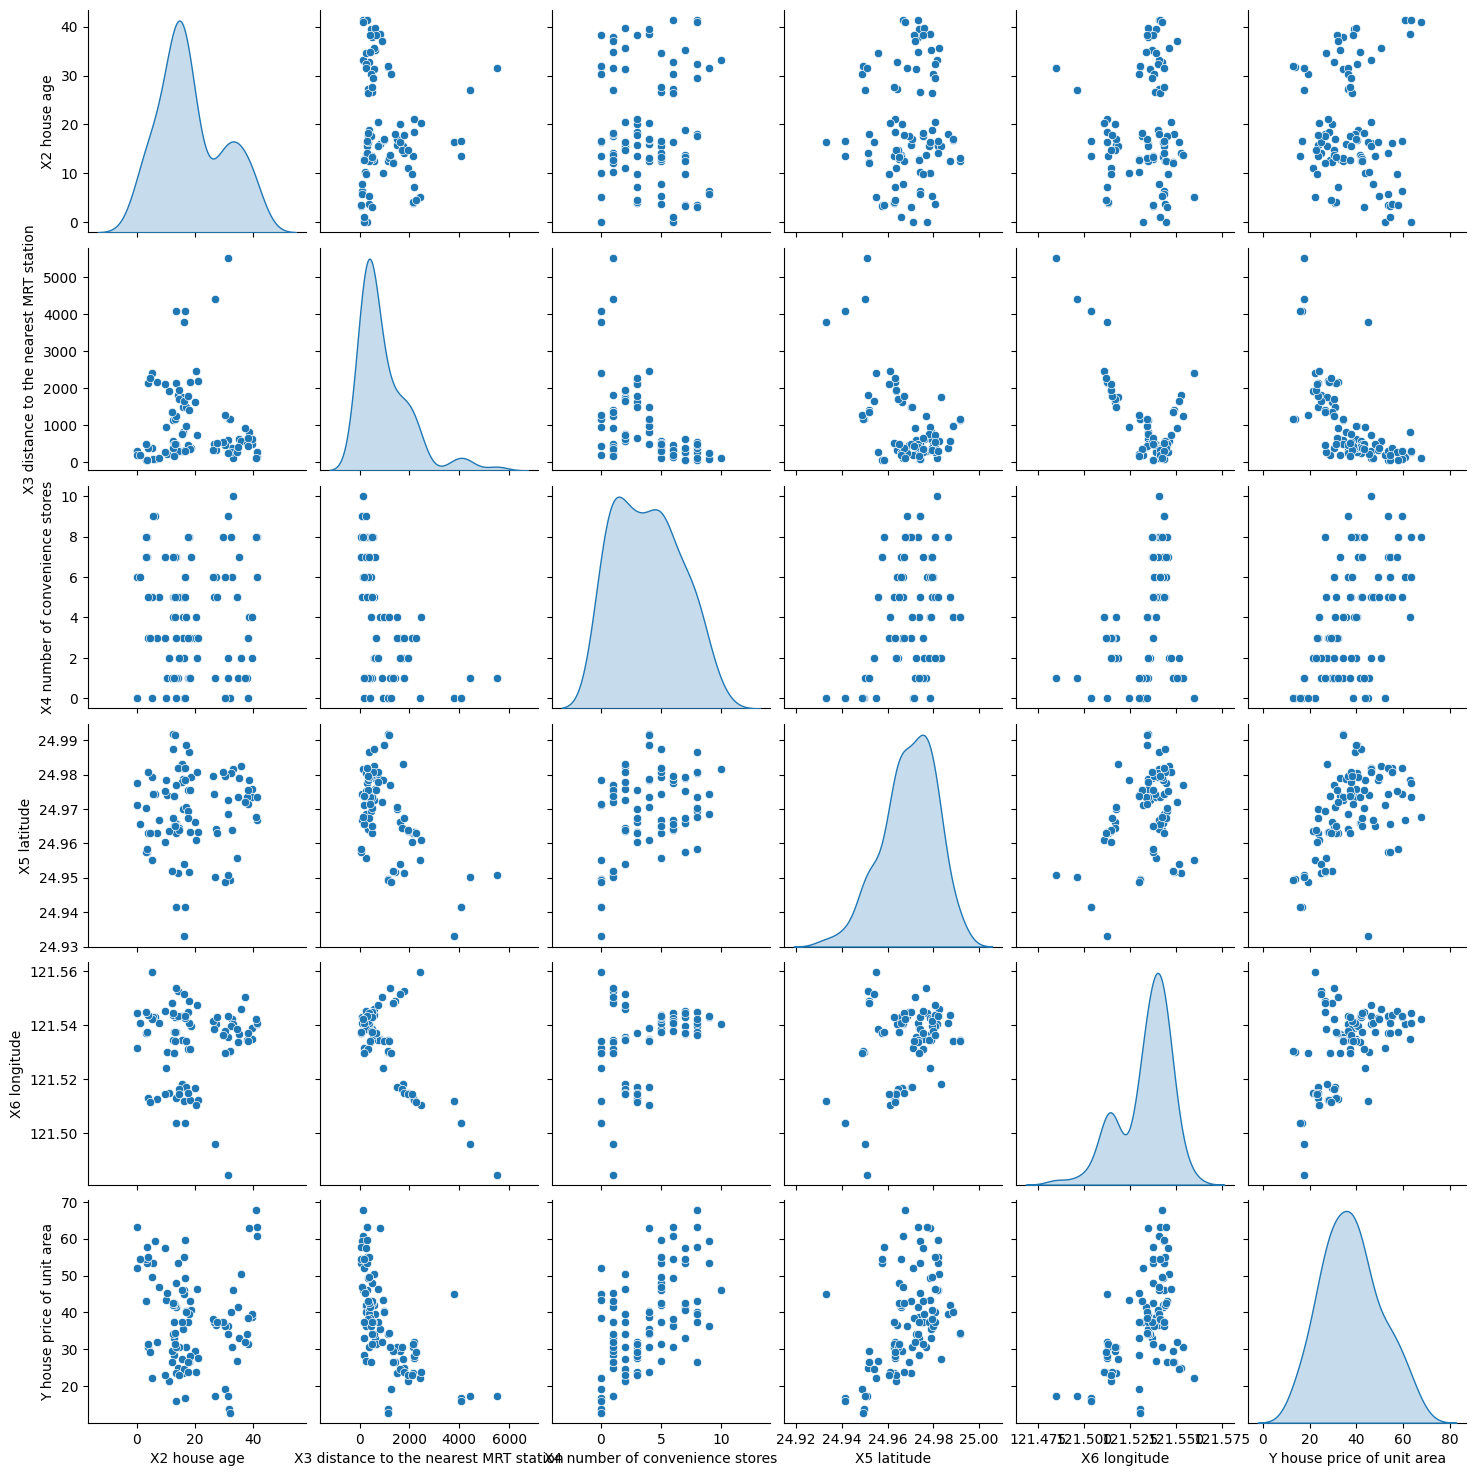

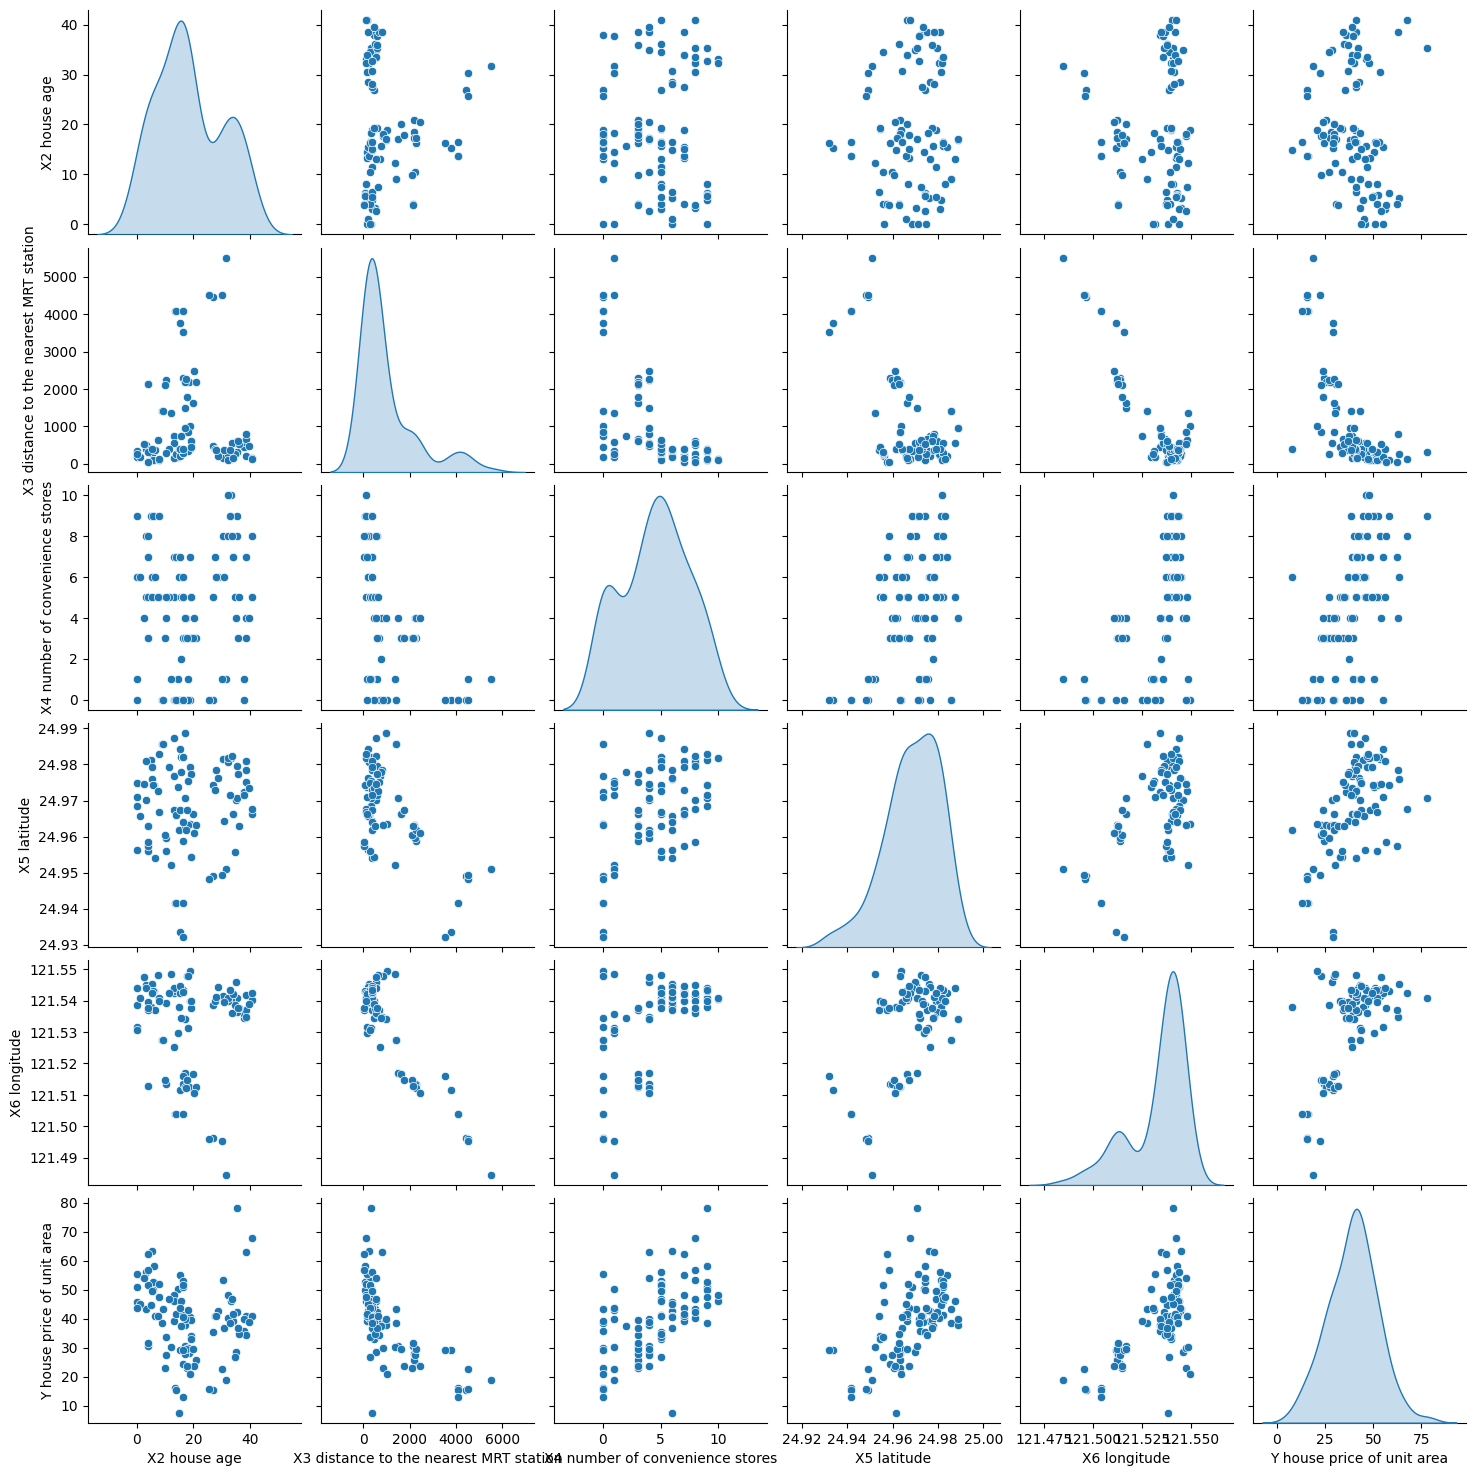

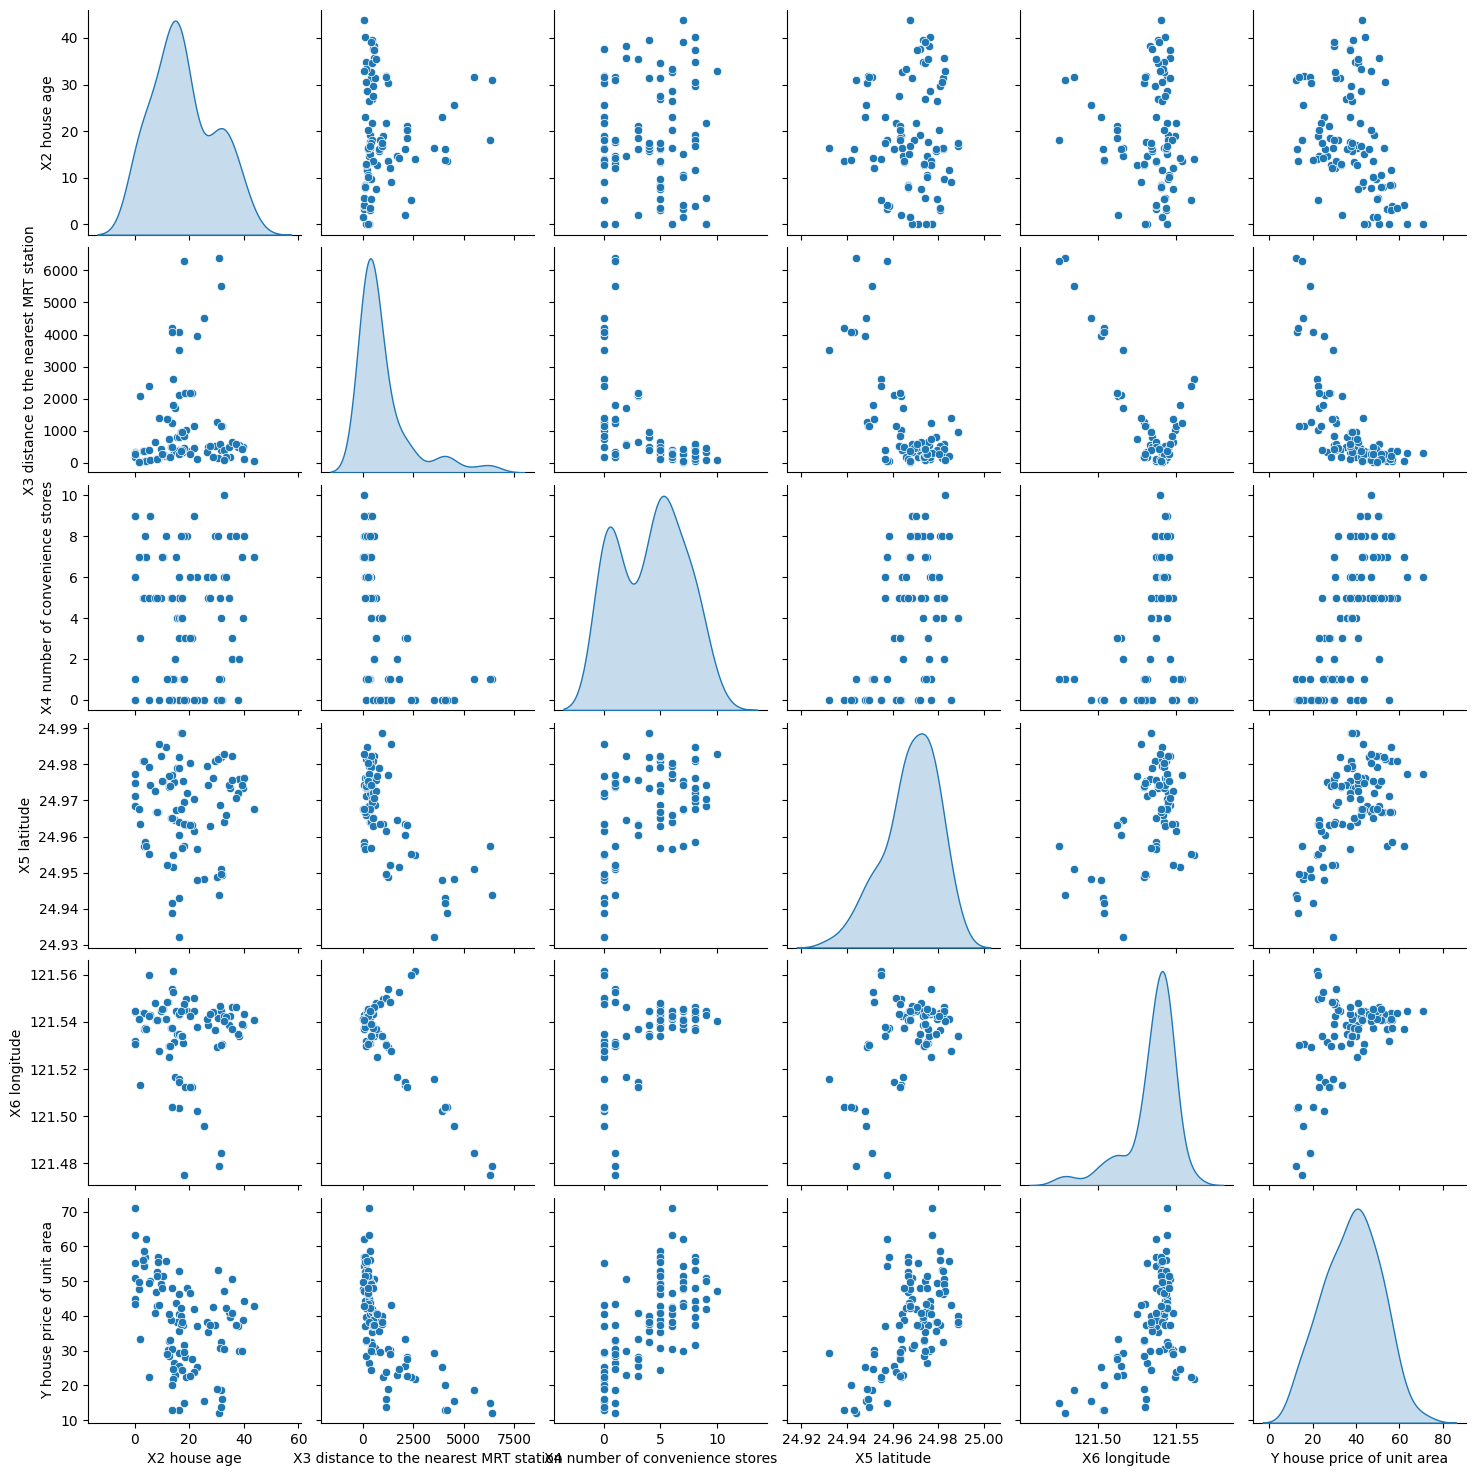

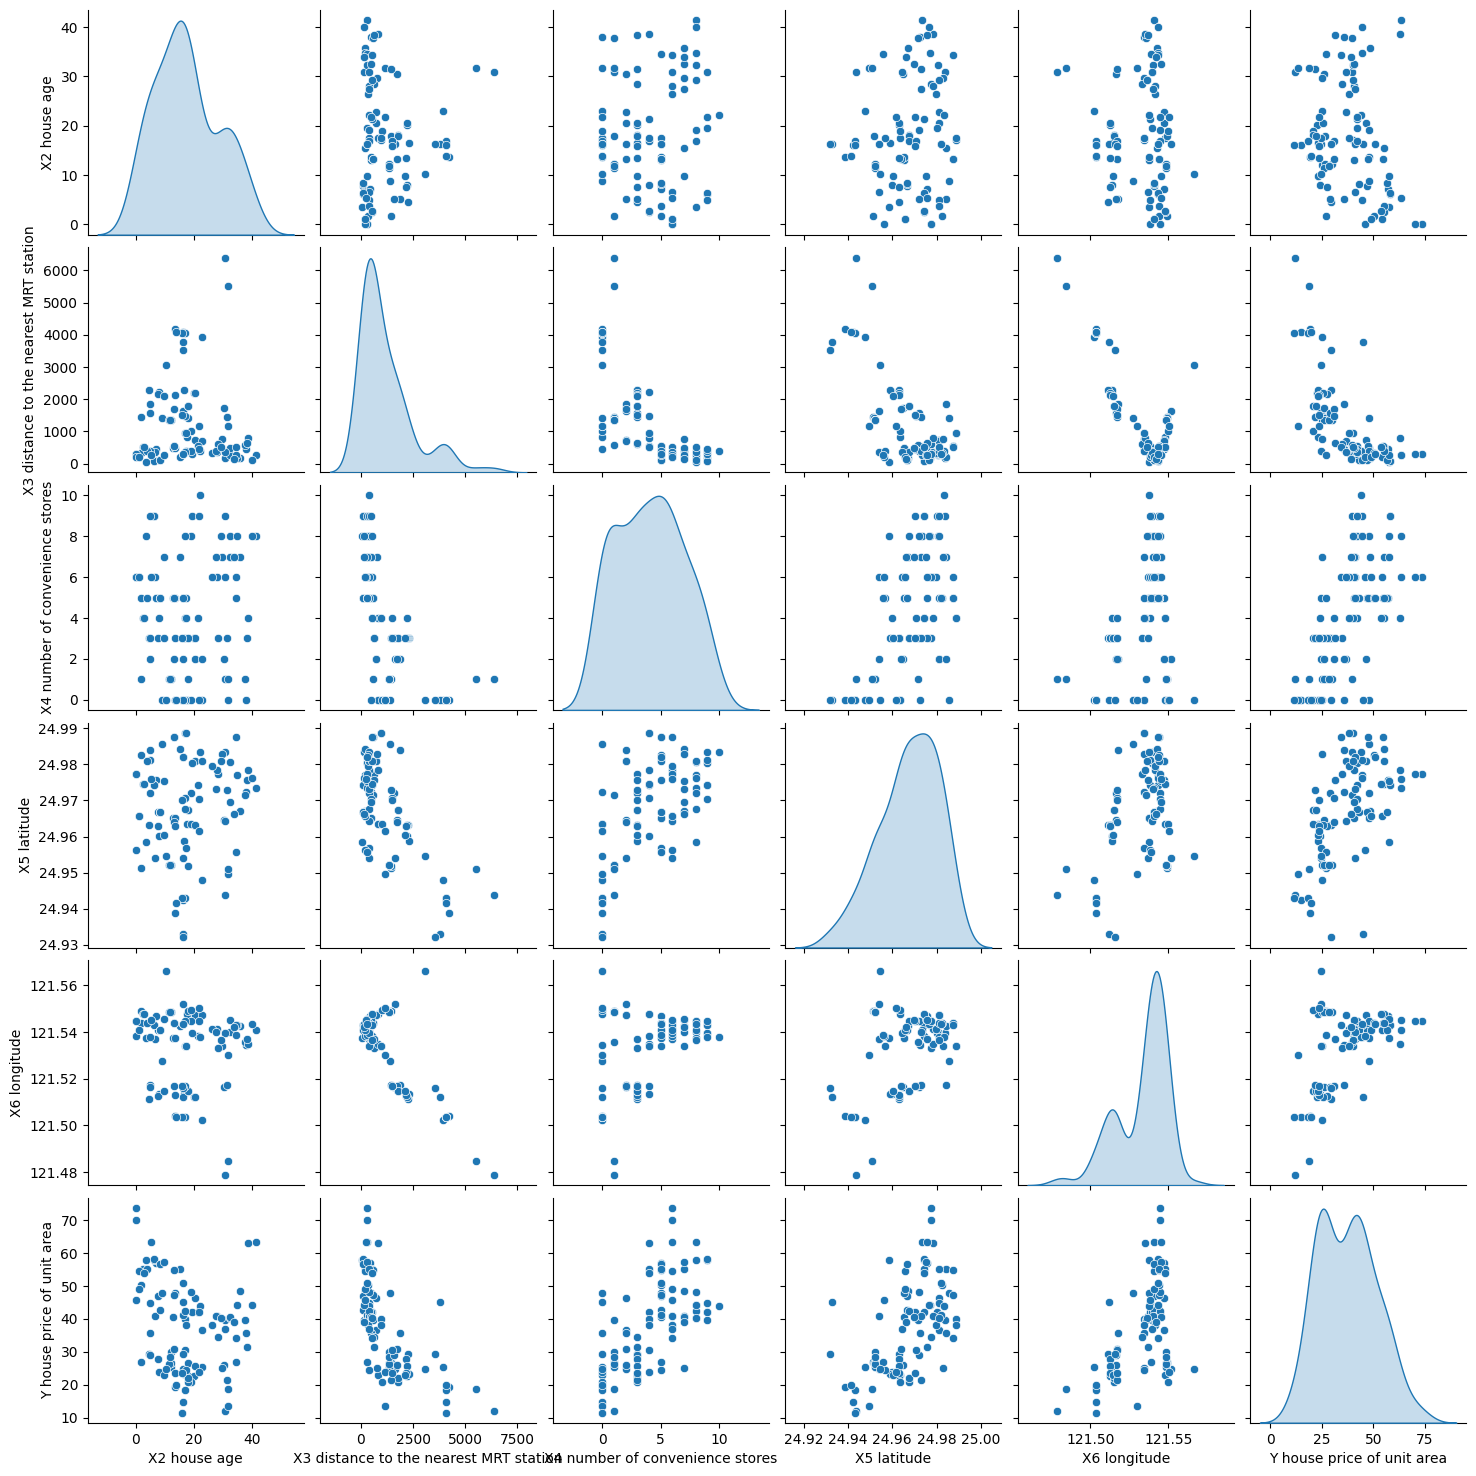

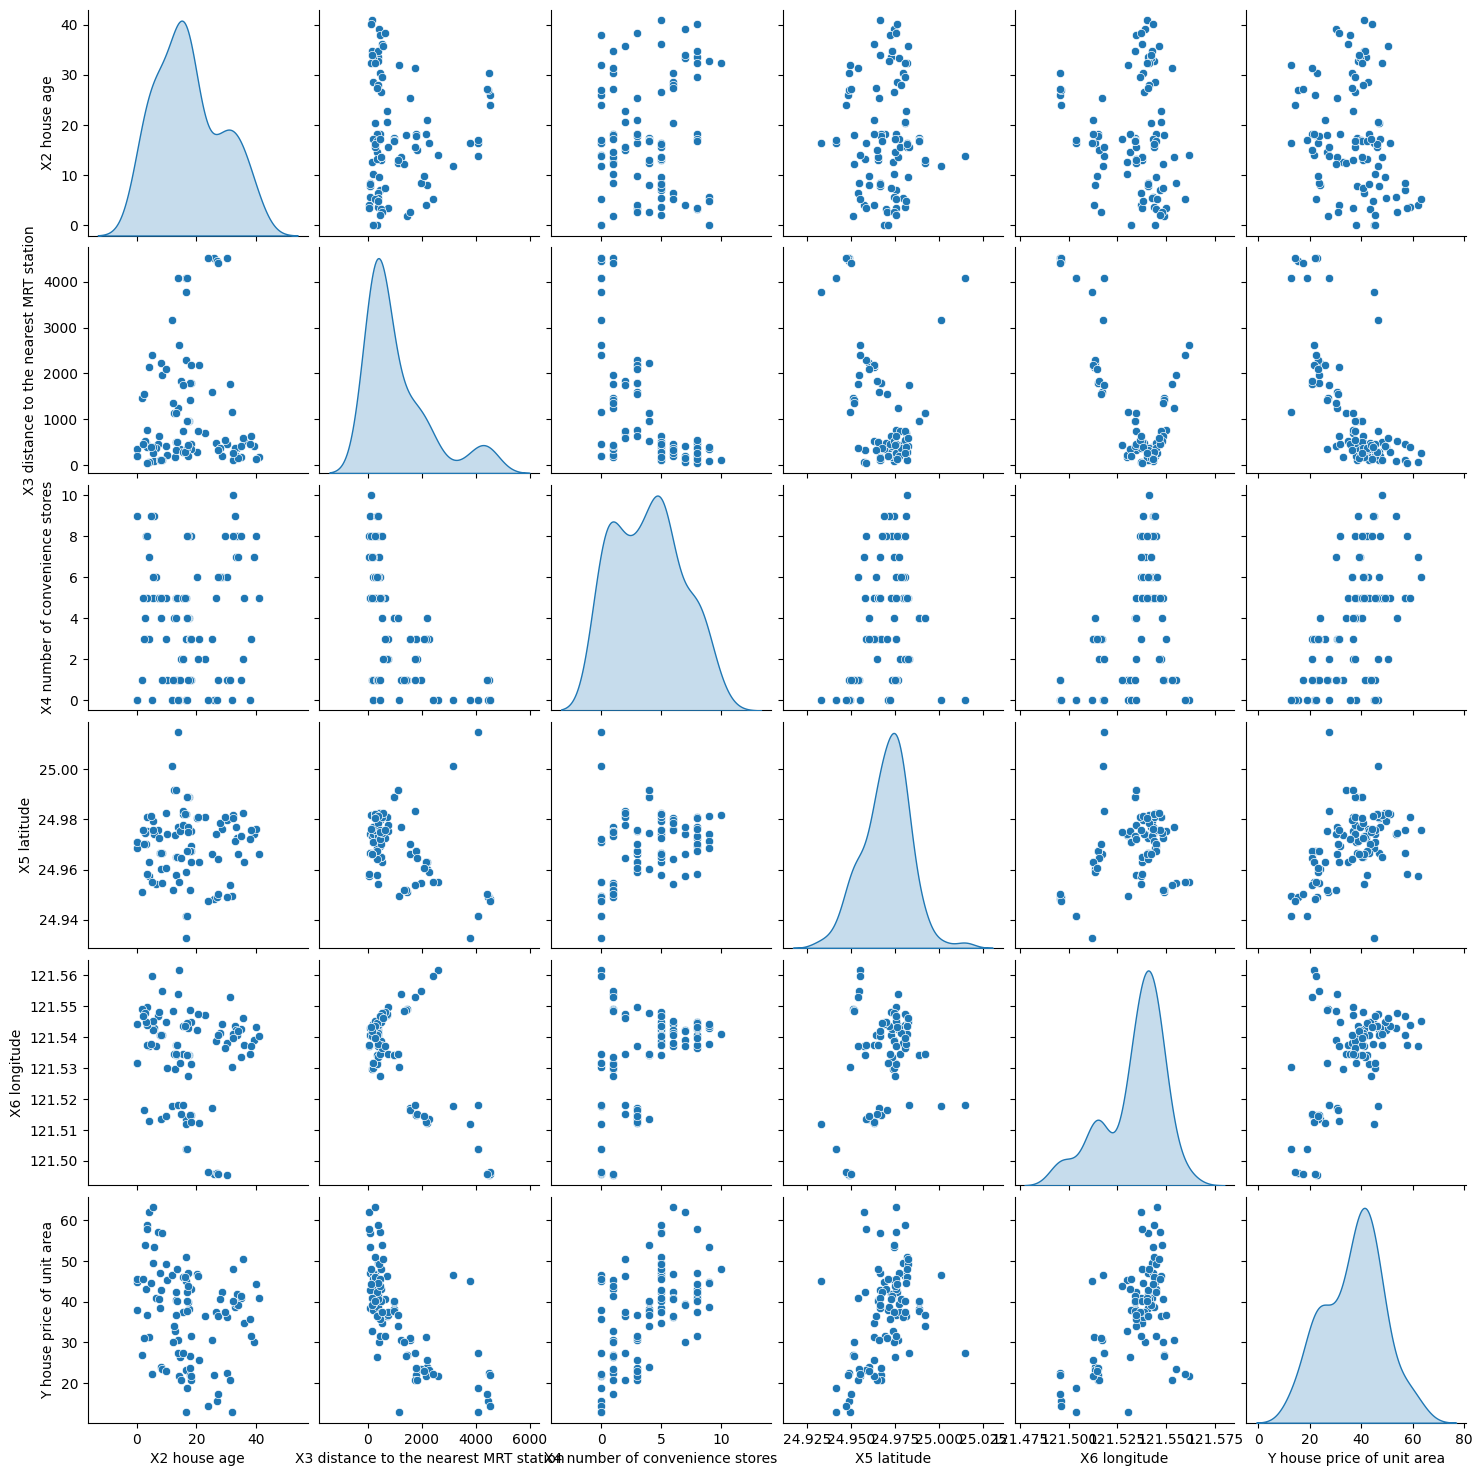

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_seed = 42

def create_pairplot(dataframe, sample_size, vars_to_plot, seed):
    subsample = dataframe.sample(n=sample_size, random_state=seed)
    sns.pairplot(subsample, vars=vars_to_plot, kind='scatter', diag_kind='kde')
    plt.show()

number_of_samples = 10
sample_size = 100
vars_to_plot = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

for i in range(number_of_samples):
    create_pairplot(data, sample_size, vars_to_plot, seed=random_seed + i)


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

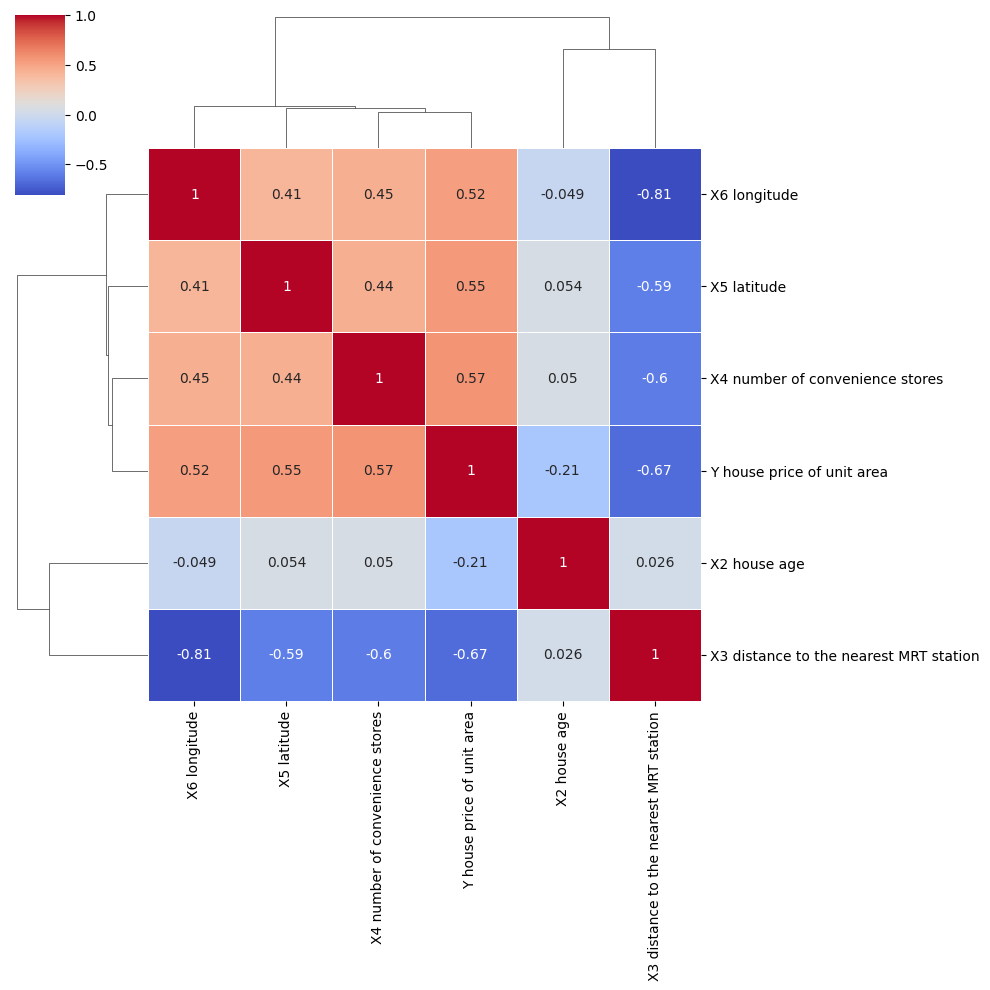

In [16]:

columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

# Calculate the correlation matrix
corr_matrix = data[columns].corr()

# Create the clustermap
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(10, 10), linewidths=.5)
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 53.933697905350485
R^2 Score: 0.6785063183090367


In [19]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.5, 1, 2]  # Epsilon in the epsilon-SVR model
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)


best_svr = grid_search.best_estimator_

y_pred_best = best_svr.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error of Best Model: {mse_best}')
print(f'R^2 Score of Best Model: {r2_best}')


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}
Mean Squared Error of Best Model: 35.78551592256852
R^2 Score of Best Model: 0.7866859178588641
